Robert Garbutt
Section 101

# Homework 7: Numerical Differentiation, Integration, Root Finding

##### ** Submit this notebook to bCourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_Home07.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Numerical integration [Ayars 2.2]

Compare results of the trapezoid integration method,  Simpson’s method, and the adaptive Gaussian quadrature method for the following integrals:

1. $$\int_0^{\pi/2}\cos x\, dx $$
1. $$\int_1^3 \frac{1}{x^2}\, dx $$
1. $$\int_2^4 (x^2+x+1)\, dx$$
1. $$\int_0^{6.9}\cos\left(\frac{\pi}{2}x^2\right)\, dx$$

For each part, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) Parts (3) and (4) are particularly interesting in this regard. In your submitted work, describe roughly how many points were required, and explain.

In [72]:
#Integral 1
import numpy as np
import scipy.integrate

def f(x):
    return np.cos(x)


def integration_trials(f,N,x_i,x_f):
    x = np.linspace(x_i,x_f,N)
    y = f(x)
    sp_result = scipy.integrate.quad(f, x_i, x_f)
    integral_trapz = scipy.integrate.trapz(y, x)
    integral_simps = scipy.integrate.simps(y, x)
    
    print('For N =',N,'trials')
    print('Trapezoid method result:',integral_trapz)
    print('Simpson method result:',integral_simps)
    print('Quadrature result:',sp_result[0])
    print('Quadrature error:',sp_result[1])
    print()

integration_trials(f,16,0,np.pi/2)
print('For the Trapezoid method it takes aound 16 trials to approach the expected value of 1 to the third decimal place, since the trapezoid method has to create a good approximation of a relatively smooth curve using jagged fitting curves.')
print()
print('For the simpson method, it takes only 7 trials before it approachs the correct answer to the third decimal place. Using parabolas would obviously take less trials since they approximate sinuisoids much better than jagged trapezoids.')

For N = 16 trials
Trapezoid method result: 0.9990859806718272
Simpson method result: 0.9999503581135661
Quadrature result: 0.9999999999999999
Quadrature error: 1.1102230246251564e-14

For the Trapezoid method it takes aound 16 trials to approach the expected value of 1 to the third decimal place, since the trapezoid method has to create a good approximation of a relatively smooth curve using jagged fitting curves.

For the simpson method, it takes only 7 trials before it approachs the correct answer to the third decimal place. Using parabolas would obviously take less trials since they approximate sinuisoids much better than jagged trapezoids.


In [73]:
#Second integral
def g(x):
    return 1/x**2
integration_trials(g,45,1,3)
print('Trapezoid method requires 45 trials to have thousandeth order precision. The higher trials probably pertains to the slow decay of the function which would require exponentially more trapezoid to approximate correctly')
print()
print('Simpson method takes only 11 trials to have thousandeth order precision. Same explanation as above for the trapezoid.')

For N = 45 trials
Trapezoid method result: 0.6669981239835152
Simpson method result: 0.666667229354294
Quadrature result: 0.6666666666666667
Quadrature error: 2.9064751454420587e-12

Trapezoid method requires 45 trials to have thousandeth order precision. The higher trials probably pertains to the slow decay of the function which would require exponentially more trapezoid to approximate correctly

Simpson method takes only 11 trials to have thousandeth order precision. Same explanation as above for the trapezoid


In [91]:
#Function 3
def Q(x):
    return x**2+x+1
integration_trials(Q,70,2,4)
print('The trapezoid method requires 70 trials to have thousandth order precision, again the trapezoid method is not very efficient at approximating high curvature functions.')
print()
print('The Simpson method only requires 3 trials to have thousandth order precision and the accuracy decreases at higher trial       numbers. Since the function is in fact a parabolic curve, the fit should only require a few trials to approximate using a parabola.Higher number of parabolas yields worse fitting. ')

For N = 70 trials
Trapezoid method result: 26.666946719876776
Simpson method result: 26.66667072540884
Quadrature result: 26.666666666666664
Quadrature error: 2.9605947323337506e-13

The trapezoid method requires 70 trials to have thousandth order precision, again the trapezoid method is not very efficient at approximating high curvature functions.

The Simpson method only requires 3 trials to have thousandth order precision and the accuracy decreases at higher trial       numbers. Since the function is in fact a parabolic curve, the fit should only require a few trials to approximate using a parabola.Higher number of parabolas yields worse fitting. 


In [145]:
#Function 4
def F(x):
    return np.cos(np.pi*x**2/2)
integration_trials(F,50,0,6.9)
print('The trapezoid method takes 17 trials to approximate to hundreth order.')
print()
print('The Simpson method takes 50 trials to approximate to hundreth order.')
print()
print('The integration values of the approximations vary radically between different trial numbers, most likely due to the rapid oscillations of the function. In this case, the trapezoid method approximates the curve earlier just by coincidence since the technique coincidentally used a more stable point on the graph.')

For N = 50 trials
Trapezoid method result: 0.49815566990687454
Simpson method result: 0.478208310289551
Quadrature result: 0.47322531435151366
Quadrature error: 1.9407006950934752e-10

The trapezoid method takes 17 trials to approximate to hundreth order.

The Simpson method takes 50 trials to approximate to hundreth order.

The integration values of the approximations vary radically between different trial numbers, most likely due to the rapid oscillations of the function. In this case, the trapezoid method approximates the curve earlier just by coincidence since the technique coincidentally used a more stable point on the graph.


### Problem 2: Numerical differentiation [Ayars 2.8]

Write a function that, given a list of abscissa values $x_i$ and function values $f_i(x_i)$, returns a list of values of the second derivative $f''(x_i)$ of the function. Test your function by giving it a list of known function values for $\sin(x)$ and making a graph of the differences between the output of the function and $−\sin(x)$. Compare your output to Python's *scipy.misc.derivative*


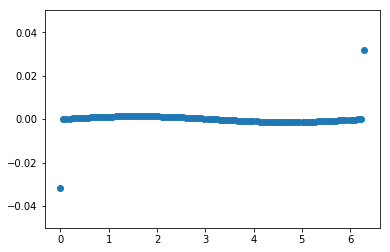

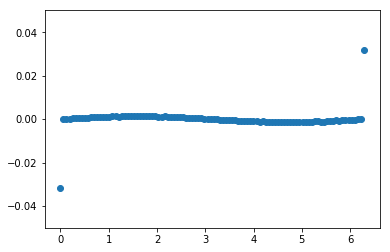

Both of the graphs look incredibly similar.


In [218]:
from scipy.misc import derivative
import matplotlib.pyplot as plt
def centered_dy(y, x): #Derivative calculator
    dyc = [0.0]*len(x)
    dyc[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)-1):
        dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
    dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

    return dyc

x = np.linspace(0,2*np.pi,num=100)

b = np.zeros((100,2))


for i in range(100):
    b[i,1]= np.sin(x[i])
    b[i,0]= x[i]
    
def second_derivative(M):
    x = centered_dy(centered_dy(M[:,1],M[:,0]),M[:,0])
    return x

y = second_derivative(b)

difference = []
for i in range(100):
    difference.append(y[i]+b[i,1])
    
    
plt.figure()
plt.scatter(x,difference)
plt.show()

dy = derivative(func=np.sin, x0=x, dx=1e-6, n=2, order=3)

difference2 = []
for i in range(100):
    difference2.append(y[i]-dy[i])
plt.figure()
plt.scatter(x,difference2)
plt.show()
print('Both of the graphs look incredibly similar.')

## Problem 3: Root Finding [Newman 6.16]

There is a magical point between the Earth and the Moon, called the
$L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect
synchrony with the Moon, staying always in between the two.  This works
because the inward pull of the Earth and the outward pull of the Moon
combine to create exactly the needed centripetal force that keeps the
satellite in its orbit. See Fig. 6.16 on p.274 of Newman. 

You may derive in 5A (or look up in a textbook) that assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, that the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r
$$
where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.

The equation above is a fifth-order polynomial equation in $r$ (also called a quintic equation). Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically.  Write a program to solve for the distance $r$ from the Earth to the $L_1$ point.  Compute a solution accurate to at least four significant figures.

The values of the various parameters are:

G = 6.674e-11 m^3 kg^-1 s^-2<br>
M = 5.974e24 kg<br>
m = 7.348e22 kg<br>
R = 3.844e8 m<br>
$\omega$ = 2.662e-6 s^-1.<br>

You will also need to choose a suitable starting value for $r$, or two
starting values if you use the secant method.


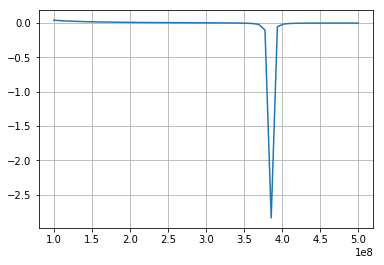

The Lagrange point is at a distance of  [3.26045072e+08] m


In [236]:
from scipy.optimize import fsolve

G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6

def Lagrange_equation(r):
    return G*M/r**2-G*m/(R-r)**2-omega**2*r

x = np.linspace(1e8,5e8)
plt.figure()
plt.plot(x,Lagrange_equation(x))
plt.grid(True)
plt.show()
x = fsolve(Lagrange_equation, 3e8) 
print('The Lagrange point is at a distance of ',x,'m')